In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
sns.set_style('darkgrid')

%matplotlib inline

In [63]:
no_NA = df.loc[(df.Longitude != 0) & (df.Latitude != 0)]
df.rename(columns = {'VIOLATION CODE':'CODE'}, inplace = True)
gdf = gpd.GeoDataFrame(
    no_NA, geometry=gpd.points_from_xy(no_NA.Longitude, no_NA.Latitude))  

In [2]:
df = pd.read_csv('../data/Inspection.csv')
fp = "../data/base_map/geo_export_68048701-5e7b-45e0-ac1c-85b45c057d6d.shp"
map_data = gpd.read_file(fp)



KeyboardInterrupt: 

Text(0.5, 1.0, 'New York City Resteraunts')

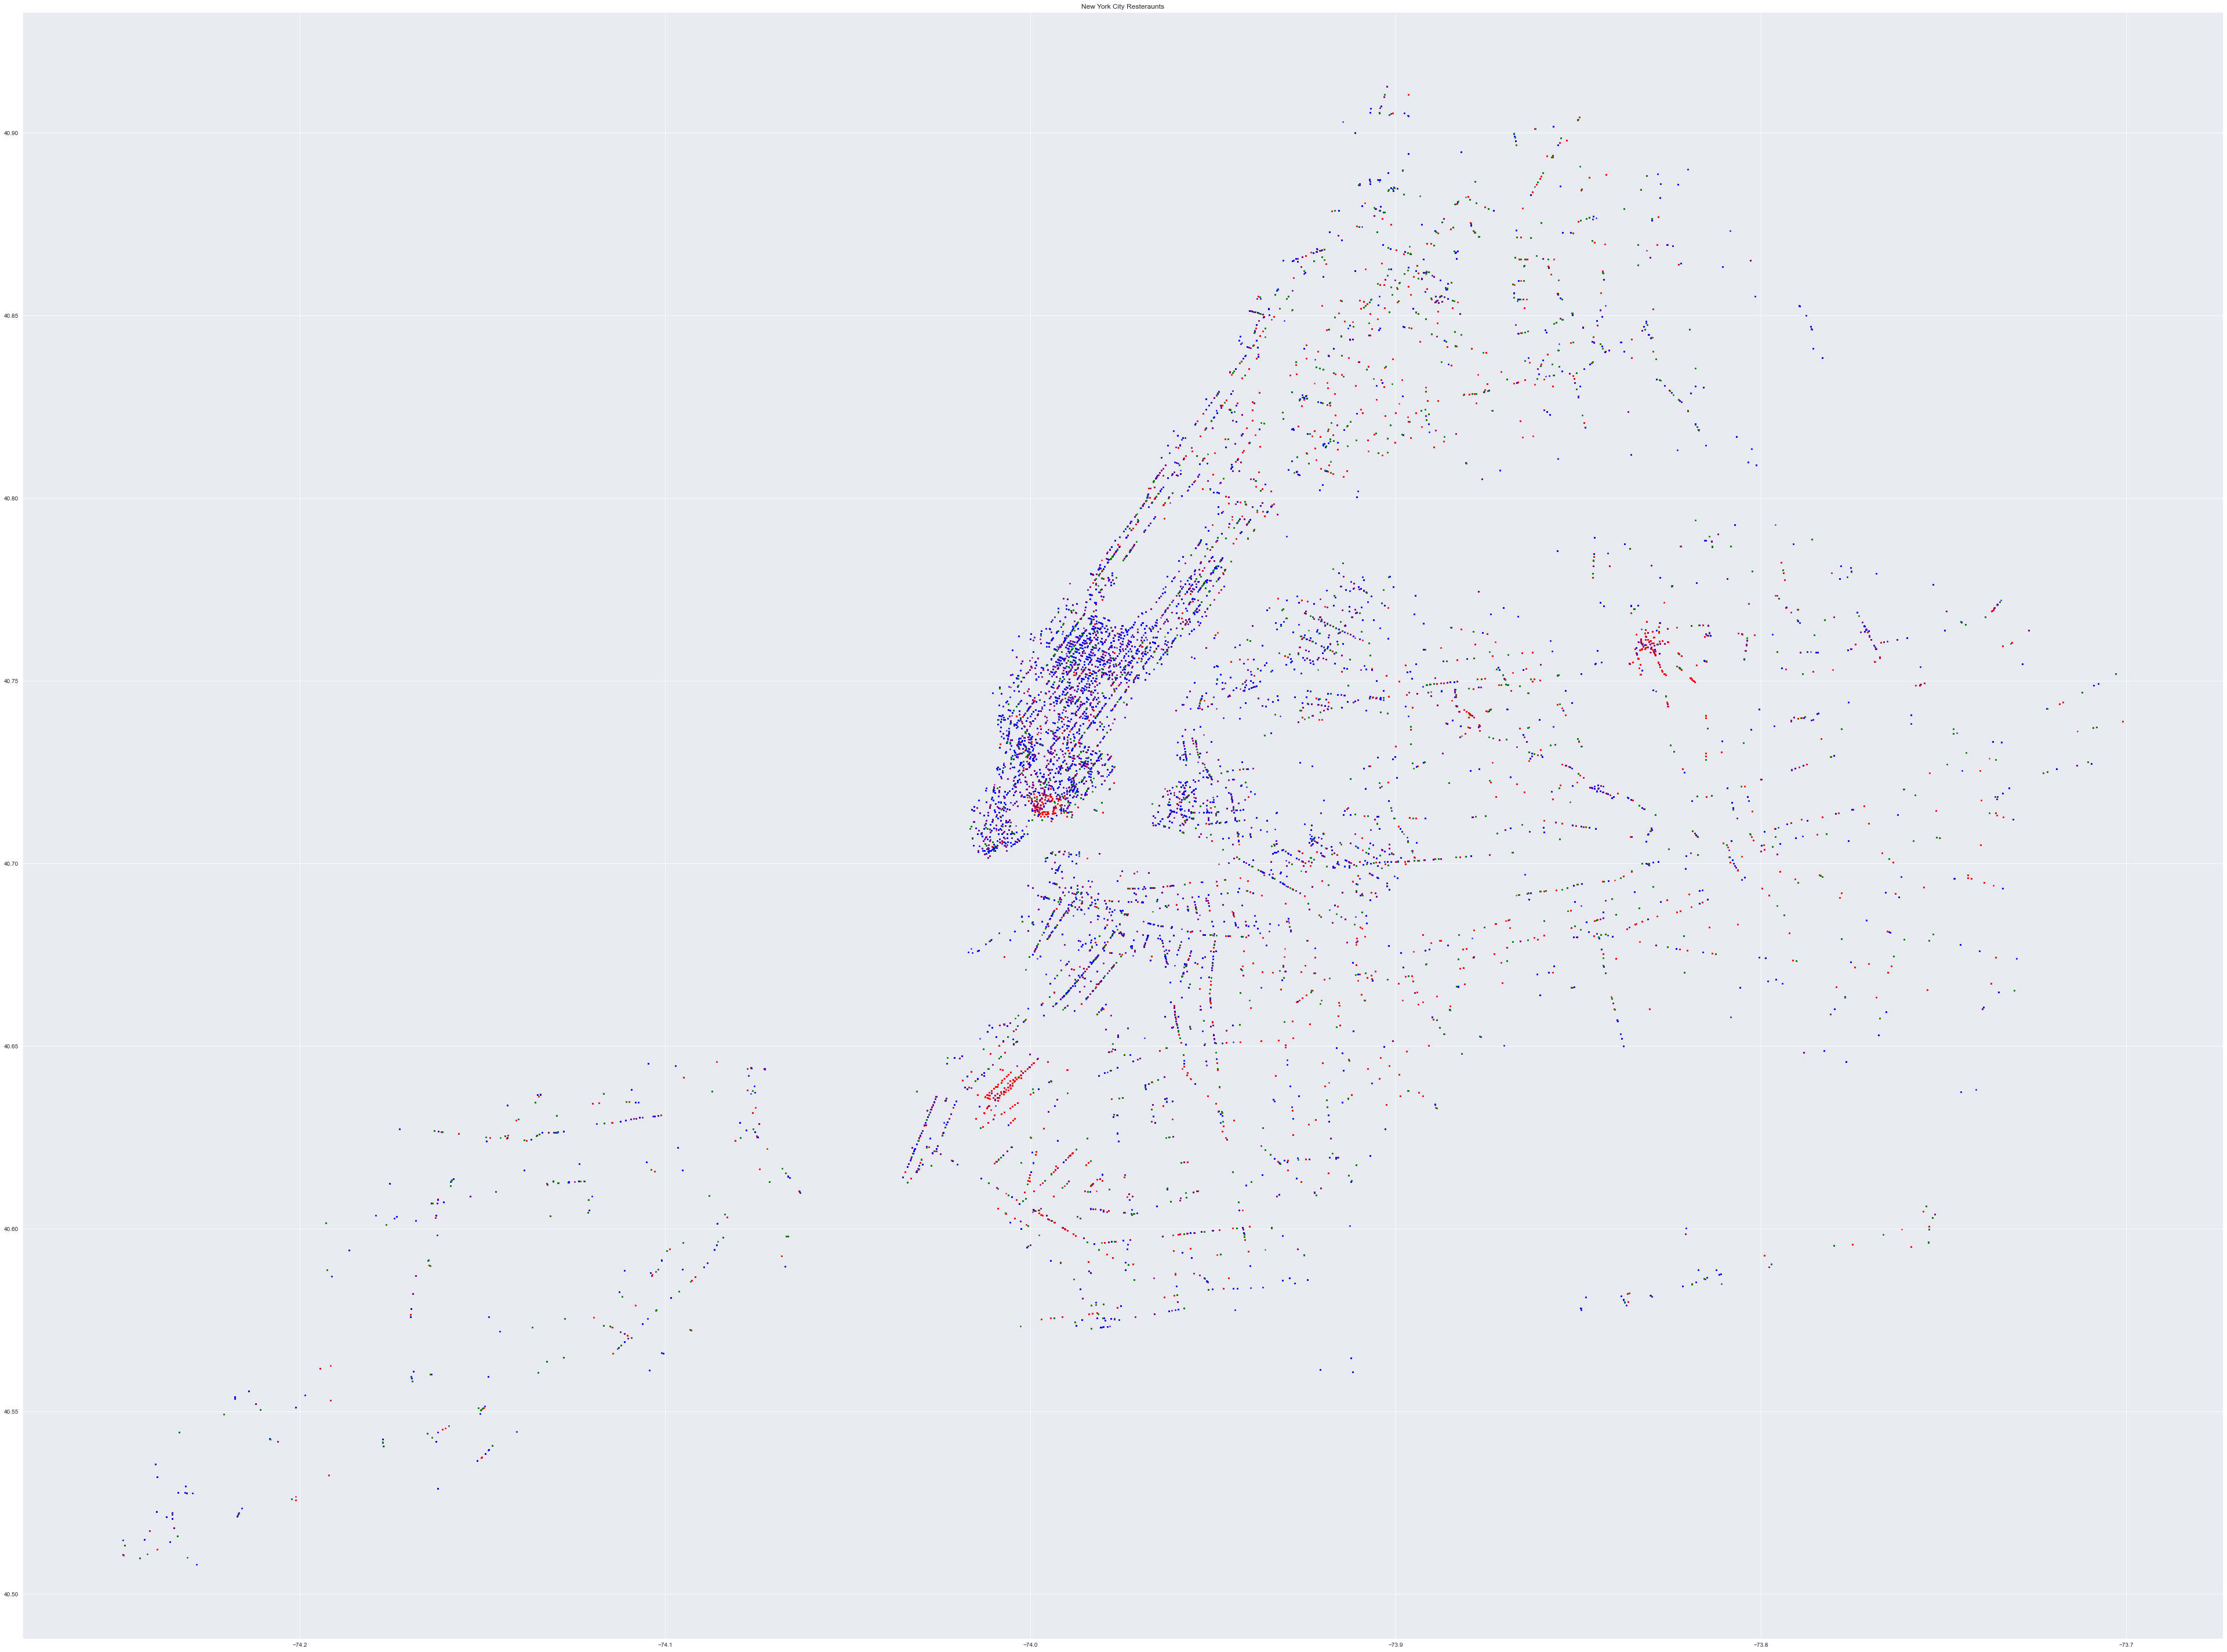

In [112]:
fig, ax = plt.subplots(figsize=(68, 80))
#map_data.plot(ax=ax, color="grey", alpha=0.4)
gdf[gdf.CUISINE == "Chinese"].plot(ax=ax, markersize=2, color="red", marker="o")
gdf[gdf.CUISINE == "American"].plot(ax=ax, markersize=2, color="blue", marker="o")
gdf[gdf.CUISINE == "Pizza"].plot(ax=ax, markersize=2, color="green", marker="o")
gdf[gdf.CUISINE == "Coffee/Tea"].plot(ax=ax, markersize=2, color="purple", marker="o")
plt.title("New York City Resteraunts")

In [6]:
df.rename(columns = {'VIOLATION CODE':'CODE'}, inplace = True)

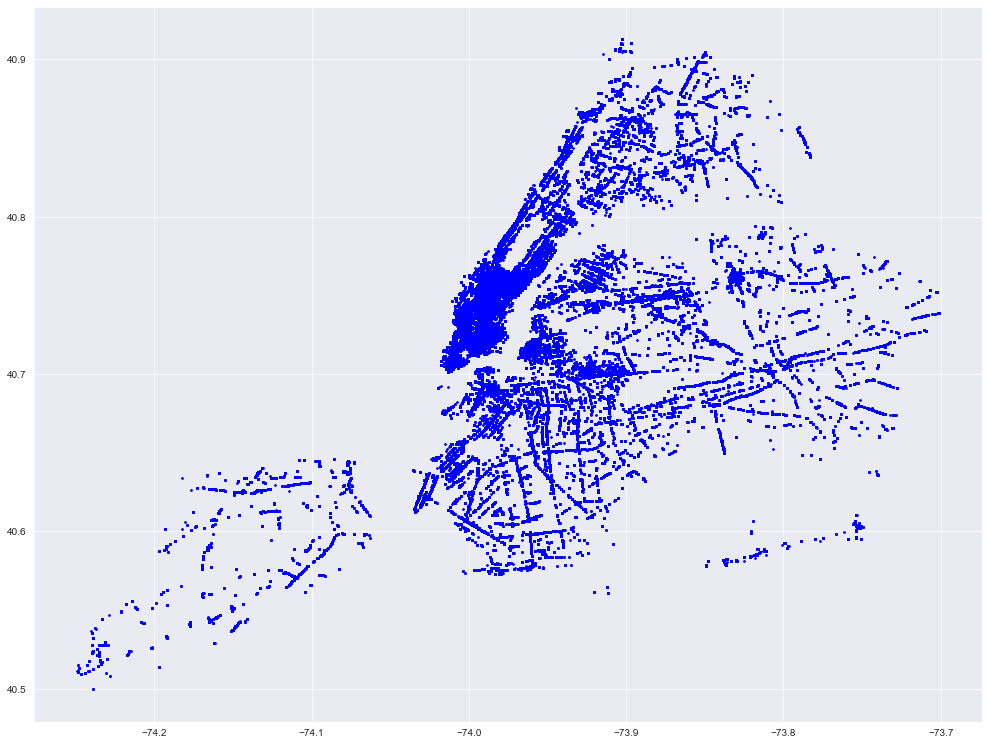

In [14]:
fig, ax = plt.subplots(figsize=(17, 20))
gdf.plot(ax=ax, markersize=3, color="blue", marker="o")

In [20]:
len(gdf[(df.CODE == '04K') | (df.CODE == '04L') ])


16350

Text(0.5, 1.0, 'New York City Resteraunts Rats in Red')

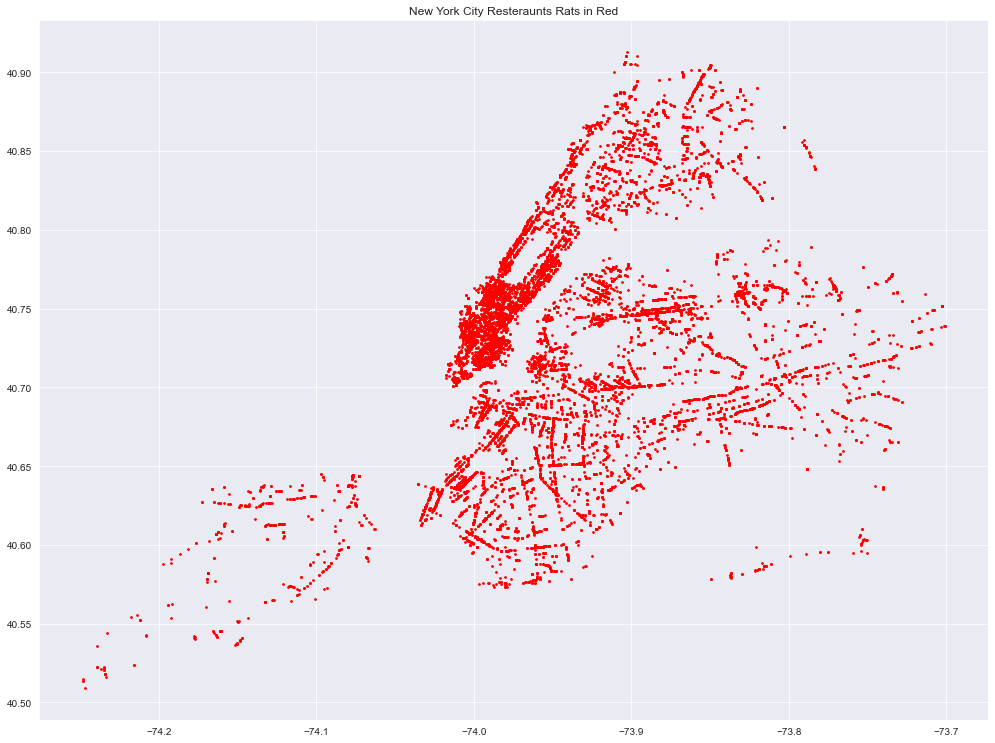

In [67]:
fig, ax = plt.subplots(figsize=(17, 20))
#map_data.plot(ax=ax, color="grey", alpha=0.4)
gdf[(df.CODE == '04K') | (df.CODE == '04L') ].plot(ax=ax, markersize=3, color="red", marker="o")
#gdf[(df.CODE != '04K') & (df.CODE != '04L') ].plot(ax=ax, markersize=1, color="black", marker="o")
plt.title("New York City Resteraunts Rats in Red")


In [40]:
mice_rest = df[(df.CODE == '04K') | (df.CODE == '04L') ]
mice_rest

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION DATE,ACTION,...,Census Tract,BIN,BBL,NTA,Location Point,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
289,41573408,LAUT,Manhattan,15,EAST 17 STREET,10003.0,2122068989,Thai,1/11/2023,Violations were cited in the following area(s).,...,5200.0,1016117.0,1.008460e+09,MN13,NaN,NaN,NaN,NaN,NaN,NaN
419,50054846,EONS,Queens,6142,188TH ST,11365.0,7184874807,Greek,1/13/2022,Violations were cited in the following area(s).,...,134700.0,4439482.0,4.070750e+09,QN41,NaN,NaN,NaN,NaN,NaN,NaN
427,50091173,CHEN KING WOK,Queens,14616,JAMAICA AVE,11435.0,7187395888,Chinese,12/6/2019,Violations were cited in the following area(s).,...,21200.0,4213896.0,4.099870e+09,QN61,NaN,NaN,NaN,NaN,NaN,NaN
558,41223224,SIRICO'S CATERING,Brooklyn,8015 23,13 AVENUE,NaN,7183312900,Italian,3/31/2022,Violations were cited in the following area(s).,...,NaN,NaN,3.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
694,40610139,VAN DAM DINER,Queens,45-55,VAN DAM STREET,11101.0,7183921686,American,8/26/2022,Violations were cited in the following area(s).,...,17900.0,4003443.0,4.002490e+09,QN31,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209502,50006286,CIBAO,Brooklyn,172,SMITH STREET,11201.0,7185961501,Spanish,1/25/2022,Violations were cited in the following area(s).,...,6900.0,3006061.0,3.003900e+09,BK38,NaN,NaN,NaN,NaN,NaN,NaN
209510,50061461,TERMINAL 5,Manhattan,610,WEST 56 STREET,10019.0,2813630900,American,2/8/2020,Violations were cited in the following area(s).,...,13500.0,1027161.0,1.011030e+09,MN15,NaN,NaN,NaN,NaN,NaN,NaN
209519,50002068,RMM LOUNGE,Bronx,658,DAWSON STREET,10455.0,7185977347,American,5/18/2019,Violations were cited in the following area(s).,...,8300.0,2005132.0,2.026860e+09,BX33,NaN,NaN,NaN,NaN,NaN,NaN
209556,50008350,BARTOLINO'S FINE ITALIAN PIZZA,Queens,34-11,BROADWAY,11106.0,3477306573,Pizza,10/24/2019,Violations were cited in the following area(s).,...,6100.0,4008935.0,4.006240e+09,QN70,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
sorted = df.sort_values(['CAMIS', 'CODE'], ascending = [True, False])
new_sorted = sorted[(sorted.CODE == '04K') | (sorted.CODE == '04L') ]
rest = sorted[(sorted.CODE != '04K') & (sorted.CODE != '04L') ]
first = new_sorted.groupby('CAMIS').first().reset_index()
first
second = rest.groupby(['CAMIS']).first().reset_index()

In [87]:
first.shape


(9695, 32)

In [88]:
second.shape

(28238, 32)

In [97]:
unique_mice = df[(df.CODE == '04K') | (df.CODE == '04L') ].CAMIS.unique()
unique_mice.size
yes_mice = df[df.CAMIS.isin(unique_mice)]
no_mice = df[~df.CAMIS.isin(unique_mice)]

In [98]:
no_mice

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION DATE,ACTION,...,Census Tract,BIN,BBL,NTA,Location Point,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,50107551,Zazzys,Manhattan,73,GREENWICH AVENUE,10014.0,6465945909,NaN,1/1/1900,NaN,...,7700.0,1010989.0,1.006140e+09,MN23,NaN,NaN,NaN,NaN,NaN,NaN
1,50131697,NaN,Brooklyn,804,GRAND STREET,11211.0,3478078023,NaN,1/1/1900,NaN,...,49500.0,3069635.0,3.027900e+09,BK90,NaN,NaN,NaN,NaN,NaN,NaN
2,50123820,787 COFFEE,Manhattan,310,WEST 14 STREET,10014.0,9082308846,NaN,1/1/1900,NaN,...,7700.0,1011707.0,1.006290e+09,MN23,NaN,NaN,NaN,NaN,NaN,NaN
3,50119514,PEBBLE BAR,Manhattan,1240,AVE OF TH AMER,NaN,7189098636,NaN,1/1/1900,NaN,...,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50127198,Verdes Italian Eatery,Staten Island,4085,VICTORY BOULEVARD,10314.0,6313030934,NaN,1/1/1900,NaN,...,29102.0,5107399.0,5.027710e+09,SI05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209563,50131767,NaN,Queens,13603,35TH AVE,11354.0,7182711678,NaN,1/1/1900,NaN,...,88901.0,4112027.0,4.049510e+09,QN22,NaN,NaN,NaN,NaN,NaN,NaN
209566,50017275,SWEETGREEN,Manhattan,100,KENMARE STREET,10012.0,6469645012,Salads,4/10/2019,Violations were cited in the following area(s).,...,4100.0,1007193.0,1.004810e+09,MN24,NaN,NaN,NaN,NaN,NaN,NaN
209568,50042352,KULUSHKAT,Brooklyn,1137,WASHINGTON AVENUE,11225.0,3473782514,Mediterranean,6/21/2022,Violations were cited in the following area(s).,...,79801.0,3340288.0,3.013270e+09,BK60,NaN,NaN,NaN,NaN,NaN,NaN
209572,50112933,DUNKIN DONUTS,Manhattan,124,EAST 57 STREET,10022.0,3474852798,Donuts,6/22/2022,Violations were cited in the following area(s).,...,11203.0,1036893.0,1.013110e+09,MN19,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
yes_mice = yes_mice.loc[(yes_mice.Longitude != 0) & (yes_mice.Latitude != 0)]
no_mice = no_mice.loc[(no_mice.Longitude != 0) & (no_mice.Latitude != 0)]

yes_geo = gpd.GeoDataFrame(
    yes_mice, geometry=gpd.points_from_xy(yes_mice.Longitude, yes_mice.Latitude))  
no_geo = gpd.GeoDataFrame(
    no_mice, geometry=gpd.points_from_xy(no_mice.Longitude, no_mice.Latitude))  

Text(0.5, 1.0, 'New York City Resteraunts Rats in Red')

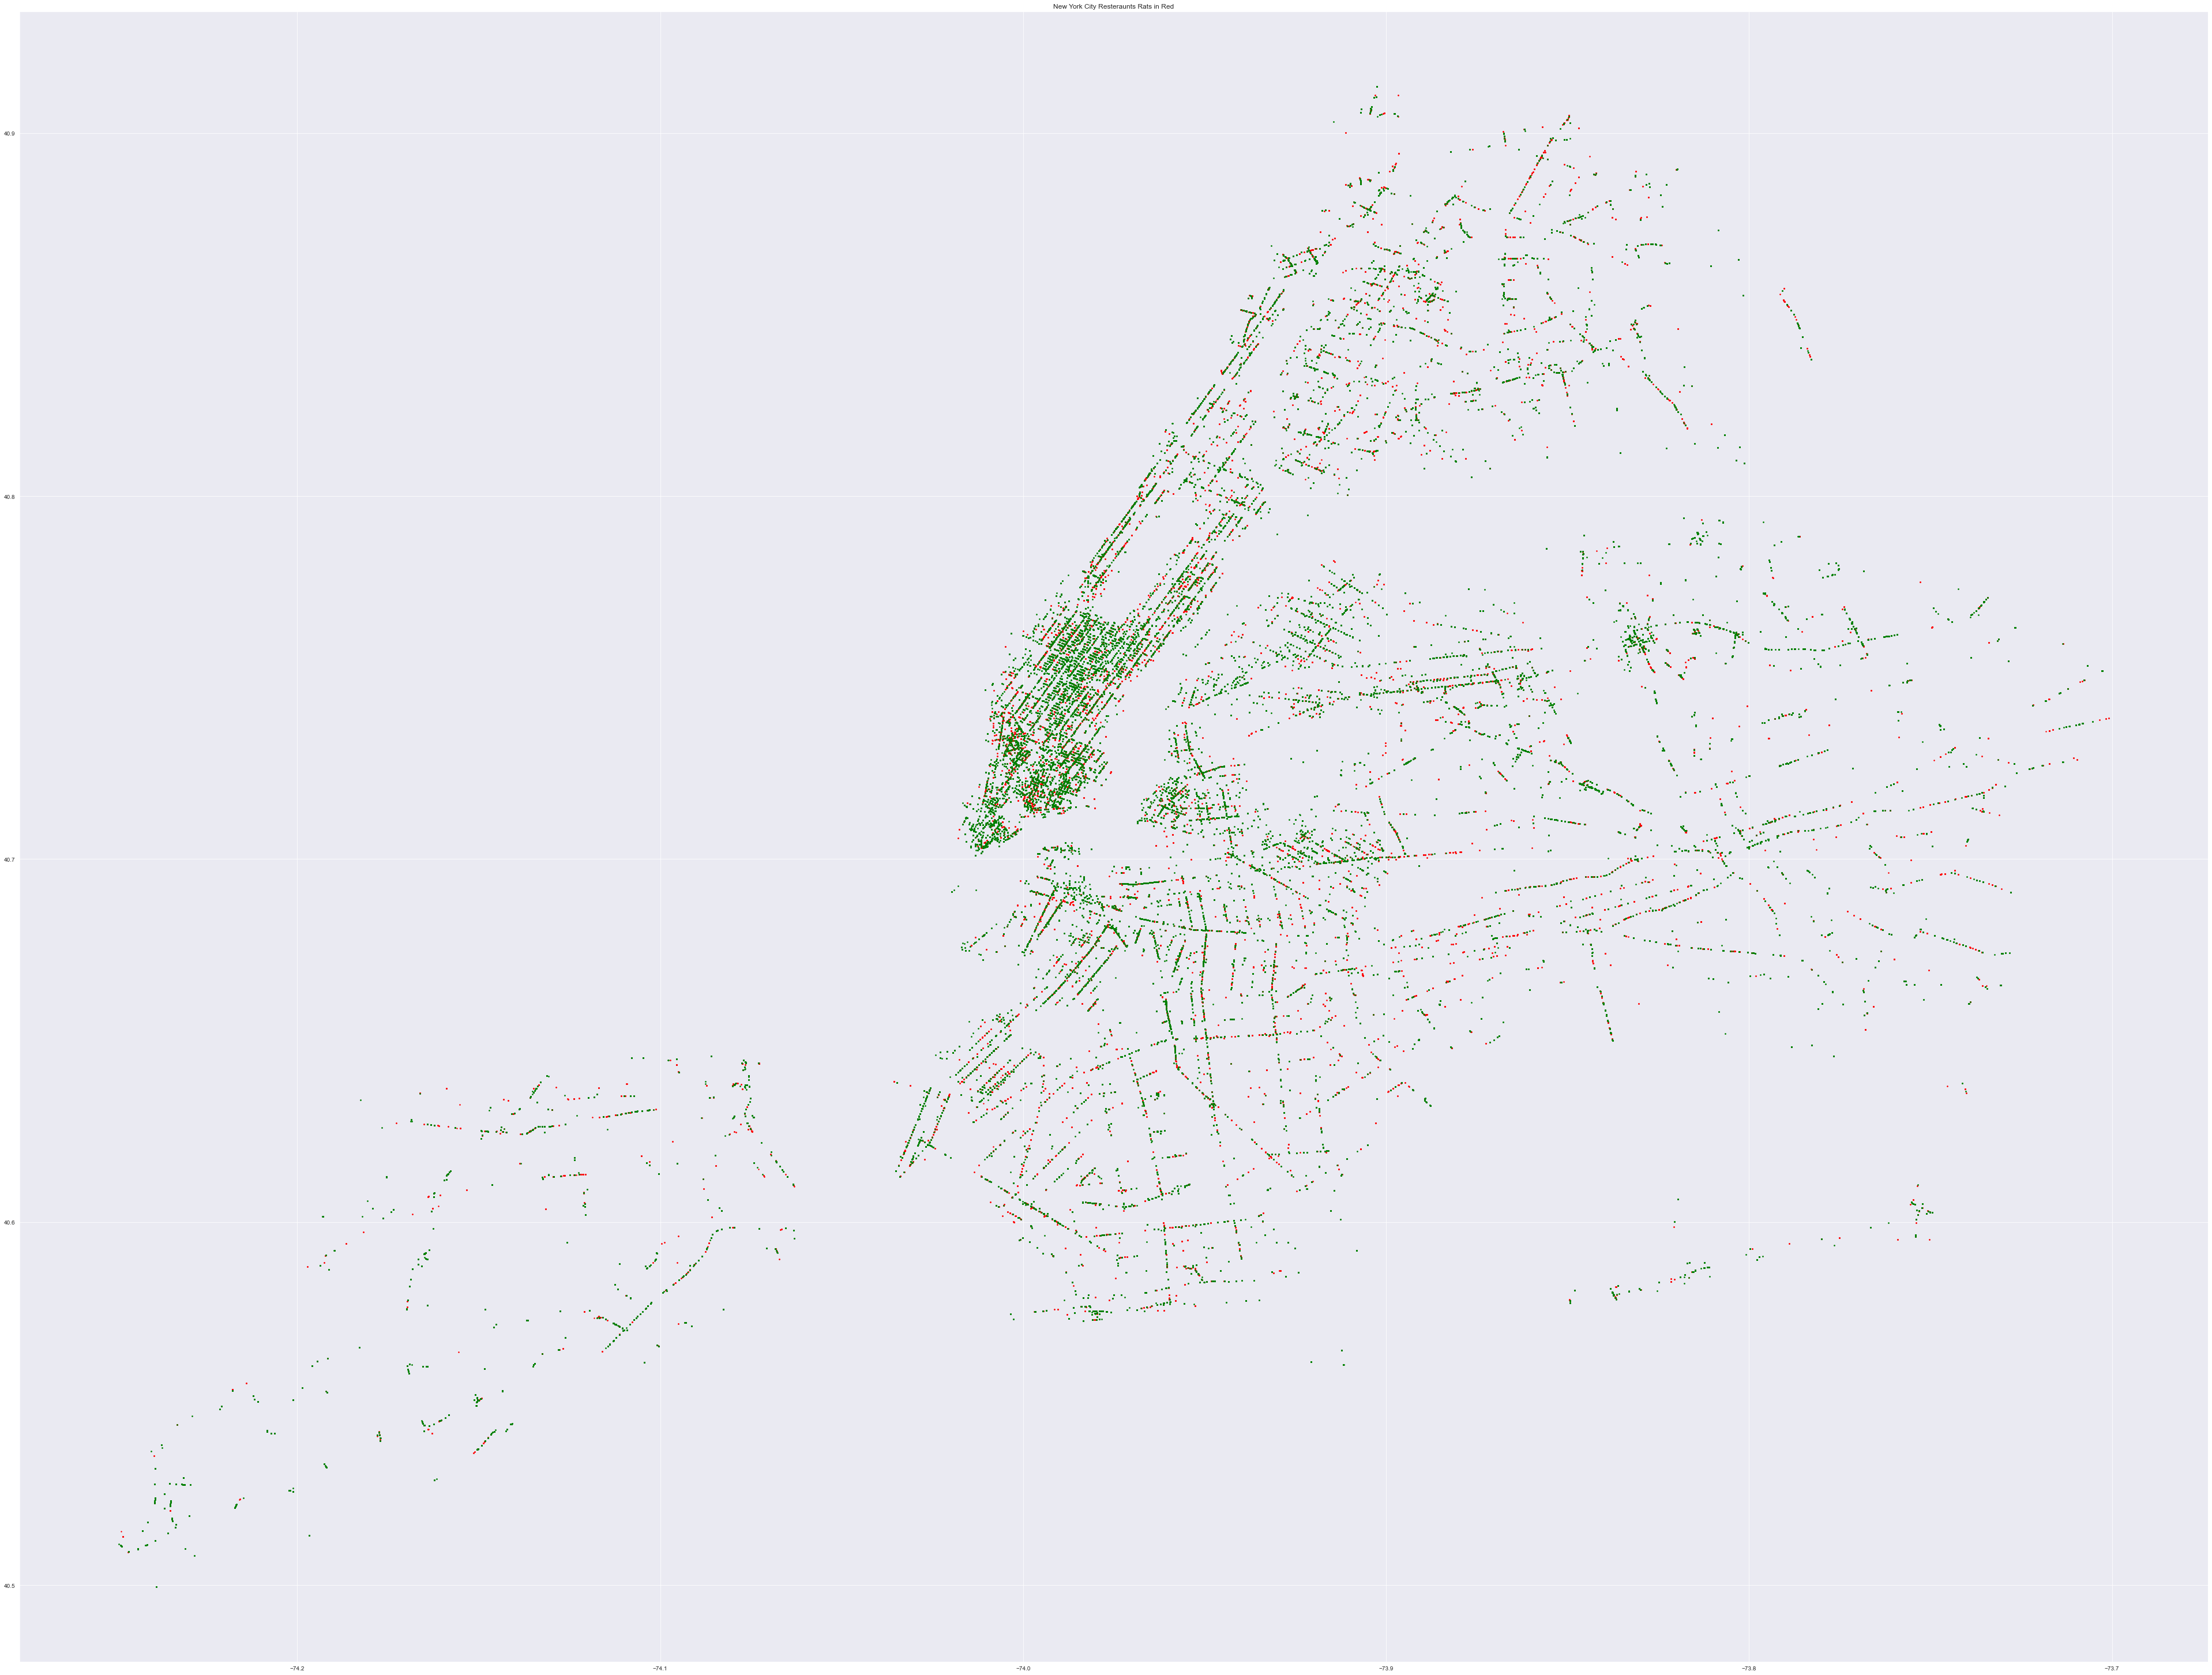

In [110]:
fig, ax = plt.subplots(figsize=(68, 80))
#map_data.plot(ax=ax, color="grey", alpha=0.4)

yes_geo.plot(ax=ax, markersize=1, color="red", marker="o")
no_geo.plot(ax=ax, markersize=3, color="green", marker="o")

plt.title("New York City Resteraunts Rats in Red")